In [48]:
!pip install transformers
!pip install transformers_interpret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import transformers
import transformers_interpret
import torch
from torch.utils.data import Dataset, DataLoader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<BarContainer object of 4 artists>

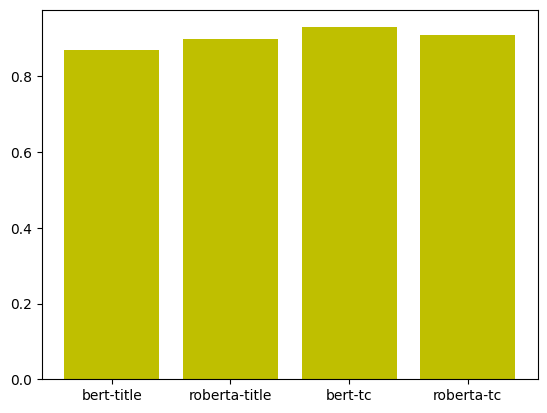

In [50]:
models = ['bert-title', 'roberta-title', 'bert-tc', 'roberta-tc']
test_acc = [0.87, 0.90, 0.93, 0.91]
train_acc = [0.93, 0.84, 0.96, 0.91]

# d = pd.DataFrame(
#     {'models' : models,
#      'train_acc': train_acc,
#       'test_acc': test_acc
#     }
# )

# d.plot(kind='bar', stacked=True)
# plt.bar(models, train_acc, color='b')
plt.bar(models, test_acc, color='y')

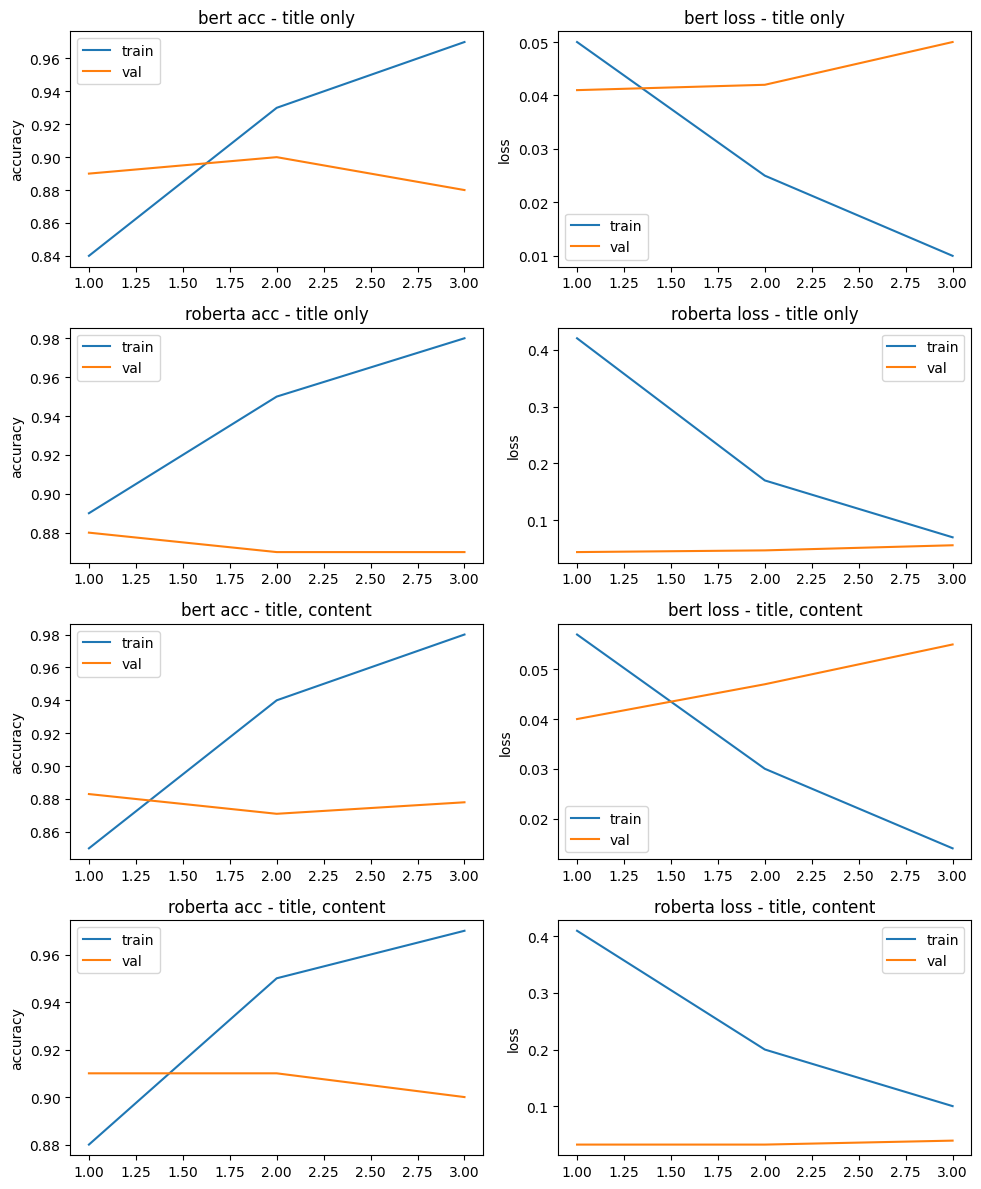

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the lineplots
epochs = [1,2,3]

"""
summary:
1 = Society & Culture
6 = Sports
5 = Computers & Internet
10 = Politics & Government

title only:
------------
train - 13,000
val - 1600
test - 1600

bert:
-----
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.50
3) val acc at 2 epochs - 0.61
4) test - 0.62

roberta:
---------
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.58
3) val acc at 2 epochs - 0.67
4) test - 0.667

so at title only level roberta was better with better test accuracy.

title and content only:
-----------------------
train - 12,000
val - 1500
test - 1500

bert:
-----
1) no loss decrease after 3 epochs
2) train acc at 3 epochs - 0.56
3) val acc at 3 epochs - 0.72
4) test - 0.72

roberta:
---------
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.62
3) val acc at 2 epochs - 0.68
4) test - 0.667

so at title and content level bert was better with 0.72 on testset.

Roberta with title and content is the best model
"""

bert_title_train_acc = [0.84, 0.93, 0.97]
bert_title_train_loss =  [0.05, 0.025, 0.01]
bert_title_val_acc = [0.89, 0.90, 0.88]
bert_title_val_loss = [0.041, 0.042, 0.050]

roberta_title_train_acc = [0.89, 0.95, 0.98]
roberta_title_train_loss =  [0.42, 0.17, 0.07]
roberta_title_val_acc = [0.88, 0.87, 0.87] 
roberta_title_val_loss = [0.044, 0.047, 0.056]

bert_title_content_train_acc =[0.85, 0.94, 0.98]
bert_title_content_train_loss = [0.057, 0.030, 0.014]
bert_title_content_val_acc = [0.883, 0.871, 0.878] 
bert_title_content_val_loss =  [0.04, 0.047, 0.055]

roberta_title_content_train_acc = [0.88, 0.95, 0.97]
roberta_title_content_train_loss =  [0.41, 0.20, 0.10]
roberta_title_content_val_acc = [0.91, 0.91, 0.90]
roberta_title_content_val_loss = [0.032, 0.032, 0.039]

# Create the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

# Plot the data on each subplot
axs[0,0].plot(epochs, bert_title_train_acc, label = 'train')
axs[0,1].plot(epochs, bert_title_train_loss, label = 'train')
axs[0,0].plot(epochs, bert_title_val_acc, label = 'val')
axs[0,1].plot(epochs, bert_title_val_loss, label = 'val')
axs[1,0].plot(epochs, roberta_title_train_acc, label = 'train')
axs[1,1].plot(epochs, roberta_title_train_loss, label = 'train')
axs[1,0].plot(epochs, roberta_title_val_acc, label = 'val')
axs[1,1].plot(epochs, roberta_title_val_loss, label = 'val')
axs[2,0].plot(epochs, bert_title_content_train_acc, label = 'train')
axs[2,1].plot(epochs, bert_title_content_train_loss, label = 'train')
axs[2,0].plot(epochs, bert_title_content_val_acc, label = 'val')
axs[2,1].plot(epochs, bert_title_content_val_loss, label = 'val')
axs[3,0].plot(epochs, roberta_title_content_train_acc, label = 'train')
axs[3,1].plot(epochs, roberta_title_content_train_loss, label = 'train')
axs[3,0].plot(epochs, roberta_title_content_val_acc, label = 'val')
axs[3,1].plot(epochs, roberta_title_content_val_loss, label = 'val')

# Add titles and labels
axs[0,0].set_title('bert acc - title only')
axs[0,1].set_title('bert loss - title only')
axs[1,0].set_title('roberta acc - title only')
axs[1,1].set_title('roberta loss - title only')
axs[2,0].set_title('bert acc - title, content')
axs[2,1].set_title('bert loss - title, content')
axs[3,0].set_title('roberta acc - title, content')
axs[3,1].set_title('roberta loss - title, content')

axs[0,0].set_ylabel('accuracy')
axs[1,0].set_ylabel('accuracy')
axs[2,0].set_ylabel('accuracy')
axs[3,0].set_ylabel('accuracy')
axs[0,1].set_ylabel('loss')
axs[1,1].set_ylabel('loss')
axs[2,1].set_ylabel('loss')
axs[3,1].set_ylabel('loss')


# Adjust the spacing between subplots
fig.tight_layout()
# axs.legend()
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()
axs[3,0].legend()
axs[3,1].legend()

# Show the plot
plt.show()


In [5]:
df = pd.read_csv("/content/drive/MyDrive/pro/8701/combined_14510_xlnet.csv")
title_only = df[(df['title_polyglot_detect'] == 'en') & (df['title_lang_detect'] == 'en') & (df['title_langid_detect'] == 'en') & (df['title_xl_detect'] == 'en')][['question_title', 'class_index']]

title_content = df[(df['title_polyglot_detect'] == 'en') & (df['title_lang_detect'] == 'en') & (df['title_langid_detect'] == 'en') & (df['title_xl_detect'] == 'en') & (df['content_polyglot_detect'] == 'en') & (df['content_lang_detect'] == 'en') & (df['content_langid_detect'] == 'en') & (df['content_xl_detect'] == 'en')][['question_title', 'question_content', 'class_index']]
title_content['title_content'] = title_content['question_title'] + " " +title_content['question_content']

In [6]:
np.random.seed(112)
df_train, df_val, df_test = np.split(title_only.sample(frac=1, random_state=42), 
                                     [int(.8*len(title_only)), int(.9*len(title_only))])

print(len(df_train),len(df_val), len(df_test)) #dataframes

13100 1637 1638


In [85]:
np.random.seed(112)
df_train_tc, df_val_tc, df_test_tc = np.split(title_content.sample(frac=1, random_state=42), 
                                     [int(.8*len(title_content)), int(.9*len(title_content))])

print(len(df_train_tc),len(df_val_tc), len(df_test_tc)) #dataframes

12026 1503 1504


In [86]:
df_test_tc.head()

,question_title,question_content,class_index,title_content
2566,why was muhammad preferential to african slaves?,did he have any white or arab slaves? n nsahih...,1,why was muhammad preferential to african slave...
16007,what are soom good baseball websites for keepi...,"i'm usually on espn.com, sfgiants.com, and mcc...",6,what are soom good baseball websites for keepi...
16922,should i moved down to atlanta ga?,i want to go to the wrestling school in atlant...,6,should i moved down to atlanta ga? i want to g...
1549,what is the name?,can you guys suggest an english name for femal...,1,what is the name? can you guys suggest an engl...
17748,"where can i buy a fox 40 whistle in brampton, ...",there seem to be a lot of places online to buy...,6,"where can i buy a fox 40 whistle in brampton, ..."


In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# specify GPU
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [10]:
label2id = {
    1: 0,
    5: 1,
    6: 2,
    10: 3
}

id2label = {
    0: 1,
    1: 5,
    2: 6,
    3: 10
}

class DatasetB(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer):

        self.labels = [label2id[label] for label in df['class_index']]
        self.tokenizer = tokenizer
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['question_title']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

class DatasetR(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer):

        self.labels = [label2id[label] for label in df['class_index']]
        self.tokenizer = tokenizer
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['title_content']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [11]:
def evaluate_b(model, test_data, tokenizer, i):

    if i == 1:
      test = DatasetB(test_data, tokenizer)
    else:
      test = DatasetR(test_data, tokenizer)
    
    pred_label = []
    test_dataloader = torch.utils.data.DataLoader(test, batch_size=8)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              pred = output.logits.argmax(dim=1)
              # print(pred)
              # print(test_label)
              # pred_label.append(pred)
              acc = (output.logits.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
              # print(pred.tolist())
              pred_label.append(pred.tolist())
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    flat_list = [item for sublist in pred_label for item in sublist]
    return flat_list

In [12]:
def evaluate_r(model, test_data, tokenizer, i):
    if i == 1:
      test = DatasetB(test_data, tokenizer)
    else:
      test = DatasetR(test_data, tokenizer)
    pred_label = []
    test_dataloader = torch.utils.data.DataLoader(test, batch_size=8)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              pred = output[0].argmax(dim=1)
              # print(pred)
              # print(test_label)
              # pred_label.append(pred)
              acc = (output[0].argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
              # print(pred.tolist())
              pred_label.append(pred.tolist())
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    flat_list = [item for sublist in pred_label for item in sublist]
    return flat_list

In [13]:
#load weights of best model
model1 = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/pro/8701/bert_model')
tokenizer1 = AutoTokenizer.from_pretrained('/content/drive/MyDrive/pro/8701/bert_model')

#load weights of best model
model2 = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/pro/8701/bert_model_content/saved_weights_1')
tokenizer2 = AutoTokenizer.from_pretrained('/content/drive/MyDrive/pro/8701/bert_model_content/saved_weights_1')

#load weights of best model
model3 = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/pro/8701/roberta_model/saved_weights_0')
tokenizer3 = AutoTokenizer.from_pretrained('/content/drive/MyDrive/pro/8701/roberta_model/saved_weights_0')

#load weights of best model
model4 = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/pro/8701/roberta_model_content/saved_weights_1')
tokenizer4 = AutoTokenizer.from_pretrained('/content/drive/MyDrive/pro/8701/roberta_model_content/saved_weights_1')

In [14]:
bert_title_preds = evaluate_b(model1, df_test, tokenizer1, 1)
bert_tc_preds = evaluate_r(model2, df_test_tc, tokenizer2, 2)
roberta_title_preds = evaluate_b(model3, df_test, tokenizer3, 1)
roberta_tc_preds = evaluate_r(model4, df_test_tc, tokenizer4, 2)

Test Accuracy:  0.871
Test Accuracy:  0.930
Test Accuracy:  0.871
Test Accuracy:  0.915


In [87]:
df_test = df_test.reset_index(drop = True)
# df_test.head()
id2label = {
    0:1,
    1:5,
    2:6,
    3:10
}


df_test['bert_title'] = [id2label[label] for label in bert_title_preds] 
df_test['roberta_title'] = [id2label[label] for label in roberta_title_preds]
df_test_tc['bert_tc'] = [id2label[label] for label in bert_tc_preds]
df_test_tc['roberta_tc'] = [id2label[label] for label in roberta_tc_preds]
df_test.head()

,question_title,class_index,bert_title,roberta_title
0,if we are supposed to have faith that god will...,1,1,1
1,at what point in american history did society ...,1,10,10
2,my computer is running really weird?,5,5,5
3,how can i browse a copy of the registry from a...,5,5,5
4,where can i fetch a nice girl to have an e mai...,1,1,1


In [88]:
df_test_tc.head()

,question_title,question_content,class_index,title_content,bert_tc,roberta_tc
2566,why was muhammad preferential to african slaves?,did he have any white or arab slaves? n nsahih...,1,why was muhammad preferential to african slave...,1,1
16007,what are soom good baseball websites for keepi...,"i'm usually on espn.com, sfgiants.com, and mcc...",6,what are soom good baseball websites for keepi...,6,6
16922,should i moved down to atlanta ga?,i want to go to the wrestling school in atlant...,6,should i moved down to atlanta ga? i want to g...,6,6
1549,what is the name?,can you guys suggest an english name for femal...,1,what is the name? can you guys suggest an engl...,1,1
17748,"where can i buy a fox 40 whistle in brampton, ...",there seem to be a lot of places online to buy...,6,"where can i buy a fox 40 whistle in brampton, ...",6,6


In [17]:
df_test['class_index'].value_counts()

10    480
1     409
5     400
6     349
Name: class_index, dtype: int64

In [18]:
print(np.sum(df_test['class_index'] == df_test['bert_title'])/len(df_test))
print(np.sum(df_test['class_index'] == df_test['roberta_title'])/len(df_test))
print(np.sum(df_test_tc['class_index'] == df_test_tc['bert_tc'])/len(df_test_tc))
print(np.sum(df_test_tc['class_index'] == df_test_tc['roberta_tc'])/len(df_test_tc))

0.8705738705738706
0.8711843711843712
0.930186170212766
0.9148936170212766


In [19]:
for i in [1, 5, 6, 10]:
  temp = df_test[df_test['class_index'] == i ]
  print(temp.shape)

  print("On class = " + str(i))
  print("Bert title = ")
  evaluate_b(model1, temp, tokenizer1, 1)
  print("RoBerta title = ")
  evaluate_b(model3, temp, tokenizer3, 1)
  
for i in [1, 5, 6, 10]:
  temp = df_test_tc[df_test_tc['class_index'] == i ]
  print(temp.shape)

  print("On class = " + str(i))
  print("Bert title content = ")
  evaluate_r(model2, temp, tokenizer2, 2)
  print("RoBerta title content = ")
  evaluate_r(model4, temp, tokenizer4, 2)

(409, 4)
On class = 1
Bert title = 
Test Accuracy:  0.829
RoBerta title = 
Test Accuracy:  0.863
(400, 4)
On class = 5
Bert title = 
Test Accuracy:  0.877
RoBerta title = 
Test Accuracy:  0.927
(349, 4)
On class = 6
Bert title = 
Test Accuracy:  0.911
RoBerta title = 
Test Accuracy:  0.842
(480, 4)
On class = 10
Bert title = 
Test Accuracy:  0.871
RoBerta title = 
Test Accuracy:  0.852
(373, 6)
On class = 1
Bert title content = 
Test Accuracy:  0.912
RoBerta title content = 
Test Accuracy:  0.858
(369, 6)
On class = 5
Bert title content = 
Test Accuracy:  0.967
RoBerta title content = 
Test Accuracy:  0.959
(324, 6)
On class = 6
Bert title content = 
Test Accuracy:  0.935
RoBerta title content = 
Test Accuracy:  0.932
(438, 6)
On class = 10
Bert title content = 
Test Accuracy:  0.911
RoBerta title content = 
Test Accuracy:  0.913


In [20]:
df_test[df_test['class_index'] == 1]['bert_title'].value_counts()

1     339
10     44
6      17
5       9
Name: bert_title, dtype: int64

In [21]:
df_test[df_test['class_index'] == 1]['roberta_title'].value_counts()

1     353
10     35
5      13
6       8
Name: roberta_title, dtype: int64

In [22]:
df_test_tc[df_test_tc['class_index'] == 1]['bert_tc'].value_counts()

1     340
10     22
6       6
5       5
Name: bert_tc, dtype: int64

In [23]:
df_test_tc[df_test_tc['class_index'] == 1]['roberta_tc'].value_counts()

1     320
10     34
6      14
5       5
Name: roberta_tc, dtype: int64

In [24]:
##F1 SCORE FOR ALL THE 4 MODELS WRT GROUND TRUTH
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [25]:
df_test['bert_title'].value_counts()

10    480
1     429
5     374
6     355
Name: bert_title, dtype: int64

In [26]:
df_test['roberta_title'].value_counts()

10    473
1     455
5     401
6     309
Name: roberta_title, dtype: int64

In [27]:
df_test_tc['bert_tc'].value_counts()

10    424
1     392
5     373
6     315
Name: bert_tc, dtype: int64

In [28]:
df_test_tc['roberta_tc'].value_counts()

10    445
5     366
1     363
6     330
Name: roberta_tc, dtype: int64

In [29]:
prec_bt = precision_score(df_test['class_index'], df_test['bert_title'], average=None)

# Recall
rec_bt = recall_score(df_test['class_index'], df_test['bert_title'], average=None)

# F1-Score
f1_bt = f1_score(df_test['class_index'], df_test['bert_title'], average=None)

prec_bt, rec_bt, f1_bt

(array([0.79020979, 0.93850267, 0.89577465, 0.87083333]),
 array([0.82885086, 0.8775    , 0.91117479, 0.87083333]),
 array([0.80906921, 0.90697674, 0.90340909, 0.87083333]))

In [30]:
prec_rbt = precision_score(df_test['class_index'], df_test['roberta_title'], average=None)

# Recall
rec_rbt = recall_score(df_test['class_index'], df_test['roberta_title'], average=None)

# F1-Score
f1_rbt = f1_score(df_test['class_index'], df_test['roberta_title'], average=None)

prec_rbt, rec_rbt, f1_rbt

(array([0.77582418, 0.92518703, 0.95145631, 0.86469345]),
 array([0.86308068, 0.9275    , 0.84240688, 0.85208333]),
 array([0.81712963, 0.92634207, 0.89361702, 0.85834208]))

In [31]:
prec_btc = precision_score(df_test_tc['class_index'], df_test_tc['bert_tc'], average=None)

# Recall
rec_btc = recall_score(df_test_tc['class_index'], df_test_tc['bert_tc'], average=None)

# F1-Score
f1_btc = f1_score(df_test_tc['class_index'], df_test_tc['bert_tc'], average=None)

prec_btc, rec_btc, f1_btc

(array([0.86734694, 0.95710456, 0.96190476, 0.94103774]),
 array([0.91152815, 0.96747967, 0.93518519, 0.9109589 ]),
 array([0.88888889, 0.96226415, 0.94835681, 0.92575406]))

In [32]:
prec_btc = precision_score(df_test_tc['class_index'], df_test_tc['roberta_tc'], average=None)

# Recall
rec_btc = recall_score(df_test_tc['class_index'], df_test_tc['roberta_tc'], average=None)

# F1-Score
f1_btc = f1_score(df_test_tc['class_index'], df_test_tc['roberta_tc'], average=None)

prec_btc, rec_btc, f1_btc

(array([0.8815427 , 0.96721311, 0.91515152, 0.8988764 ]),
 array([0.85790885, 0.95934959, 0.93209877, 0.91324201]),
 array([0.86956522, 0.96326531, 0.9235474 , 0.90600227]))

In [51]:
t_len = list(title_content['question_title'].apply(lambda x: len(x)))
t_1, t_5, t_6, t_10 = t_len[:5000], t_len[5000:10000], t_len[10000:15000], t_len[15000:]

In [52]:
sum(t_1)/len(t_1), sum(t_5)/len(t_5), sum(t_6)/len(t_6), sum(t_10)/len(t_10)

(61.0982, 65.0928, 59.372, 62.54545454545455)

<BarContainer object of 4 artists>

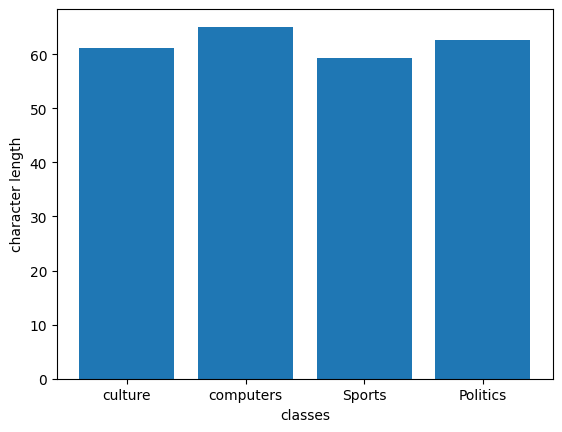

In [177]:
classes = ['culture', 'computers', 'Sports', 'Politics']
lens_t = [sum(t_1)/len(t_1), sum(t_5)/len(t_5), sum(t_6)/len(t_6), sum(t_10)/len(t_10)]
plt.ylabel("character length")
plt.xlabel("classes")
plt.bar(classes, lens_t)

In [33]:
tc_len = list(title_content['title_content'].apply(lambda x: len(x)))
tc_1, tc_5, tc_6, tc_10 = tc_len[:5000], tc_len[5000:10000], tc_len[10000:15000], tc_len[15000:]

In [34]:
sum(tc_1)/len(tc_1), sum(tc_5)/len(tc_5), sum(tc_6)/len(tc_6), sum(tc_10)/len(tc_10)

(325.4384, 306.6176, 232.4606, 260.1818181818182)

<BarContainer object of 4 artists>

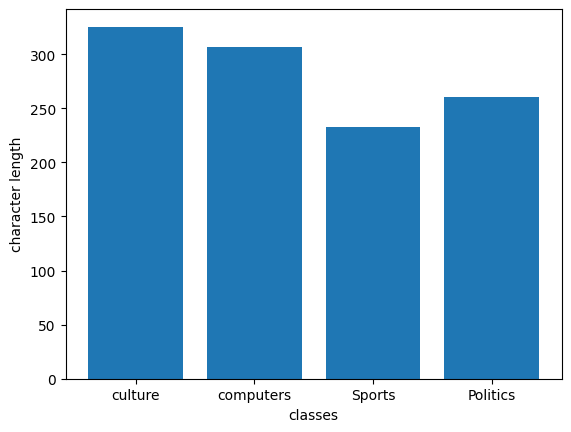

In [178]:
classes = ['culture', 'computers', 'Sports', 'Politics']
lens = [sum(tc_1)/len(tc_1), sum(tc_5)/len(tc_5), sum(tc_6)/len(tc_6), sum(tc_10)/len(tc_10)]
plt.ylabel("character length")
plt.xlabel("classes")
plt.bar(classes, lens)

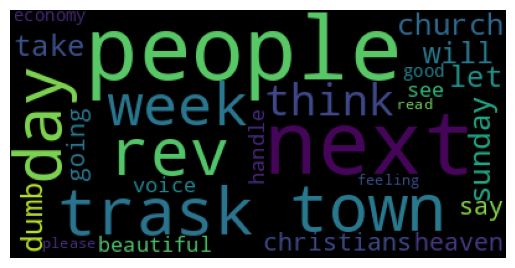

In [36]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 1]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

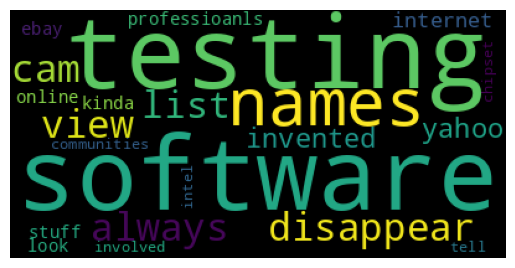

In [37]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 5]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

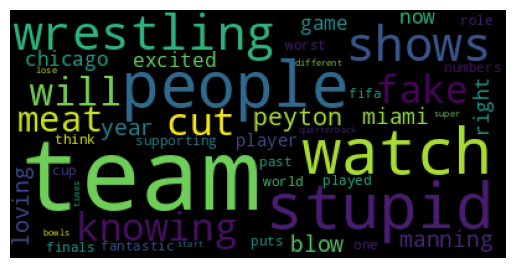

In [38]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 6]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

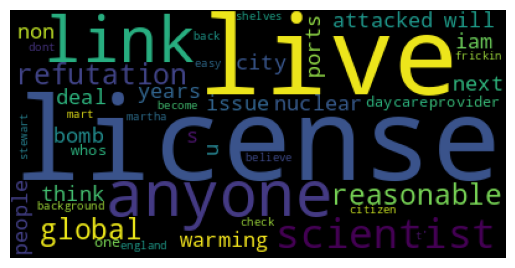

In [39]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 10]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [64]:
model2.config.id2label = {
    0: 'cultural',
    1: 'computers',
    2: 'sports',
    3: 'political'
}

model1.config.id2label, model3.config.id2label, model4.config.id2label = model2.config.id2label, model2.config.id2label, model2.config.id2label

In [139]:
tc_index = df_test_tc[(df_test_tc['class_index'] == df_test_tc['bert_tc'])].index # & (df_test_tc['class_index'] != df_test_tc['roberta_tc'])

In [140]:
t_index = df_test[(df_test['class_index'] != df_test['bert_title'])].index #& (df_test['class_index'] != df_test['roberta_title'])

In [141]:
validation_indices = [ i for i in tc_index if i in t_index]

In [142]:
df_test.iloc[validation_indices]

,question_title,class_index,bert_title,roberta_title
1549,what's the deal on the scheidegger i.t course ...,5,6,5
1269,where can you find pics of zac efron with out ...,5,6,6
120,who wants to dance naked ?,1,6,1
1545,national id card and microchips?,1,10,10
1368,"our problems, what do you think?",1,10,1
294,go to precisionbullets.com and tell me what th...,6,5,5
1192,where can i find information on the ocean tide...,6,1,6
168,write a story ending with 'all we could do now...,1,6,1
1000,i know this sound silly if your r a person tha...,5,1,1
928,iam a single mother of 2 how do i get in to an...,10,1,1


In [145]:
df_test_tc.iloc[196]

question_title            will the new ps3 out perform the xbox 306,?
question_content    if you have xbox 306 what are the pro's and con's
class_index                                                         5
title_content       will the new ps3 out perform the xbox 306,? if...
bert_tc                                                             5
roberta_tc                                                          5
Name: 10848, dtype: object

In [149]:
# df_test[df_test['question_title'] == "czech and usa ranked above italy?	"]
# df_test_tc.head(
# df_test[df_test["question_title"].str.find('usa') == 1]
text = "why dosent jesus play hockey?"
mask = df_test['question_title'].str.contains(text, case=False)

print(np.unique(mask))

# Filter the DataFrame based on the mask
result = df_test[mask]

# Print the filtered DataFrame
print(result)


mask = df_test_tc['question_title'].str.contains(text, case=False)

print(np.unique(mask))

# Filter the DataFrame based on the mask
result = df_test_tc[mask]

# Print the filtered DataFrame
print(result)

[False  True]
                   question_title  class_index  bert_title  roberta_title
30  why dosent jesus play hockey?            6           6              1
[False  True]
                      question_title                       question_content  \
16028  why dosent jesus play hockey?  because he got nailed inot the boards   

       class_index                                      title_content  \
16028            6  why dosent jesus play hockey? because he got n...   

       bert_tc  roberta_tc  
16028        1           6  


In [148]:
mistake_in_roberta_title = list(df_test[df_test['class_index'] != df_test['roberta_title']]['question_title'])
correct_in_roberta_tc = list(df_test_tc[df_test_tc['class_index'] == df_test_tc['roberta_tc']]['question_title'])

for i in mistake_in_roberta_title:
  if i in correct_in_roberta_tc:
    print(i)

why dosent jesus play hockey?
was i neglected?
how to look up license plate numbers on the web?
guys > would you rather get your feet tickled barefoot or with your socks on?
what can be done to fix the bcs?
death pentalty?


In [174]:
df_test[df_test['question_title'].str.contains("how to look up license plate numbers on the web?", case=False)]
# df_test_tc[df_test_tc['question_title'].str.contains("how to look up license plate numbers on the web?", case=False)]

,question_title,class_index,bert_title,roberta_title
455,how to look up license plate numbers on the web?,10,5,5


In [175]:
from transformers_interpret import SequenceClassificationExplainer
multiclass_explainer = SequenceClassificationExplainer(model=model3, tokenizer=tokenizer3)
# test 1, 10; 1000; 1050
# train
# = 'who won between italy and usa?'
pos = 455
text=df_test['question_title'].iloc[pos]
label=df_test['class_index'].iloc[pos]
print(text)

word_attributions = multiclass_explainer(text)
print(multiclass_explainer.predicted_class_name)
num_eng = {
    1: 'culture',
    5: 'computers',
    6: 'sports',
    10: 'political'
}
print(num_eng[label])
# num_eng[multiclass_explainer.predicted_class_name]

how to look up license plate numbers on the web?
computers
political


In [176]:
multiclass_explainer.visualize()

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,computers (0.73),computers,1.89,#s how to look up license plate numbers on the web ? #/s


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,computers (0.73),computers,1.89,#s how to look up license plate numbers on the web ? #/s


In [173]:
from transformers_interpret import SequenceClassificationExplainer
multiclass_explainer = SequenceClassificationExplainer(model=model4, tokenizer=tokenizer4)
# test 1, 10; 1000; 1050
# train
# = 'who won between italy and usa?'
pos = 8517
text=df_test_tc['title_content'].loc[pos]
label=df_test_tc['class_index'].loc[pos]
print(text)

word_attributions = multiclass_explainer(text)
print(multiclass_explainer.predicted_class_name)
num_eng = {
    1: 'culture',
    5: 'computers',
    6: 'sports',
    10: 'political'
}
print(num_eng[label])
# num_eng[multiclass_explainer.predicted_class_name]
multiclass_explainer.visualize()

how to look up license plate numbers on the web? a friend of mine was in a fender bender and the driver who hit him begged him not to call the police, so he didn't and they exchanged information. bad idea, the other driver verbally gave him the insurance policy number an expired one. now my friend is getting the run around he can't do much with out a plate number. n nif anyone knows how i can obtain this kind of information, preferably free please tell!!!!!!
political
political


In [55]:
print("English text: where can i find stuff for truckers for their myspace page?")
print("Word-piece:" + str(tokenizer1.tokenize("where can i find stuff for truckers for their myspace page?", add_special_tokens=True, max_length=10, padding='max_length')))
print("Byte-pair:" + str(tokenizer3.tokenize("where can i find stuff for truckers for their myspace page?", add_special_tokens=True, max_length=10, padding='max_length')))

English text: where can i find stuff for truckers for their myspace page?
Word-piece:['[CLS]', 'where', 'can', 'i', 'find', 'stuff', 'for', 'truck', '##ers', 'for', 'their', 'myspace', 'page', '?', '[SEP]']
Byte-pair:['<s>', 'where', 'Ġcan', 'Ġi', 'Ġfind', 'Ġstuff', 'Ġfor', 'Ġtruck', 'ers', 'Ġfor', 'Ġtheir', 'Ġmy', 'space', 'Ġpage', '?', '</s>']


In [42]:
print(tokenizer1("who invented the internet?", add_special_tokens=True, max_length=10, padding='max_length')['input_ids'])
print(tokenizer1("who invented the internet?", add_special_tokens=True, max_length=10, padding='max_length')['token_type_ids'])
print(tokenizer1("who invented the internet?", add_special_tokens=True, max_length=10, padding='max_length')['attention_mask'])

[101, 2040, 8826, 1996, 4274, 1029, 102, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [43]:
print(tokenizer1.tokenize("where can i find stuff for truckers for their myspace page?", add_special_tokens=True, max_length=10, padding='max_length'))

['[CLS]', 'where', 'can', 'i', 'find', 'stuff', 'for', 'truck', '##ers', 'for', 'their', 'myspace', 'page', '?', '[SEP]']


In [44]:
print(tokenizer4.tokenize("where can i find stuff for truckers for their myspace page?", add_special_tokens=True, max_length=10, padding='max_length'))

['<s>', 'where', 'Ġcan', 'Ġi', 'Ġfind', 'Ġstuff', 'Ġfor', 'Ġtruck', 'ers', 'Ġfor', 'Ġtheir', 'Ġmy', 'space', 'Ġpage', '?', '</s>']


In [45]:
model1

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [47]:
model3

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
